#### Author: Domitille Jarrige
#### Date: 2022-05-02

# _Dioszegia hungarica_ spacial analyses:

#### Modules import

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import geopy
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point

%matplotlib inline 
plt.rcParams["figure.figsize"] = [25, 20]

geolocator = geopy.Nominatim(user_agent="IGNFrance")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

#### Data loading

Map template loading.

In [2]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

Annotated results of the search for closely related to _Dioszegia hungarica_ PDD-24b-2 organisms in public metagenomic samples (recovered with sra-tools). 
The analyses was performed using sra-tools blastn_vdb, with _Dioszegia hungarica_ PDD-24b-2 ITS region as query and a minimum percentage identity threshold of 97%.

In [3]:
df_meta = pd.read_csv("../../Dioszegia/distribution_geographique/results_D_hungarica_metagenomes_only.tsv", sep="\t")

df_nega = df_meta[df_meta["Presence_D.hungarica"] == False]

df_meta = df_meta[df_meta["Presence_D.hungarica"] == True]
df_meta = df_meta[(df_meta["lat_lon"] != "not collected") & (df_meta["lat_lon"] != "nan nan")]

#### Data processing

Coordinates are processed to allow mapping.

In [4]:
def convert_latlon(coordinates):
    """
    Change N, E, W, S coordinates in a tuple of simple
    decimal coordinates.
    """
    list_coor = str(coordinates).split()
    if len(list_coor) == 4 :
        if list_coor[1] == "S":
            list_coor[0] = -float(list_coor[0])
        if list_coor[3] == "W":
            list_coor[2] = -float(list_coor[2])
        return Point(float(list_coor[2]), float(list_coor[0]))
    else:
        return


In [5]:
%%capture --no-display
df_meta["Coordinates"] = "NA"
df_nega["Coordinates"] = "NA"

for n in range(len(df_meta)):
    df_meta["Coordinates"].iloc[n] = convert_latlon(df_meta["lat_lon"].iloc[n])

df_meta_locations = gpd.GeoDataFrame(columns=("geometry", "address"))
df_meta_locations.geometry = df_meta[df_meta["Coordinates"] != "NA"]["Coordinates"]
df_meta_locations.address = df_meta[df_meta["Coordinates"] != "NA"]["geo_loc_name"]


for i in range(len(df_nega)):
    df_nega["Coordinates"].iloc[i] = convert_latlon(df_nega["lat_lon"].iloc[i])

df_nega_locations = gpd.GeoDataFrame(columns=("geometry", "address"))
df_nega_locations.geometry = df_nega[df_nega["Coordinates"] != "NA"]["Coordinates"]
df_nega_locations.address = df_nega[df_nega["Coordinates"] != "NA"]["geo_loc_name"]

#### Map plotting

##### _Dioszegia hungarica_ distribution map according to sample environmental types

Text(0.5, 1.0, 'Distribution of $Dioszegia$ $hungarica$')

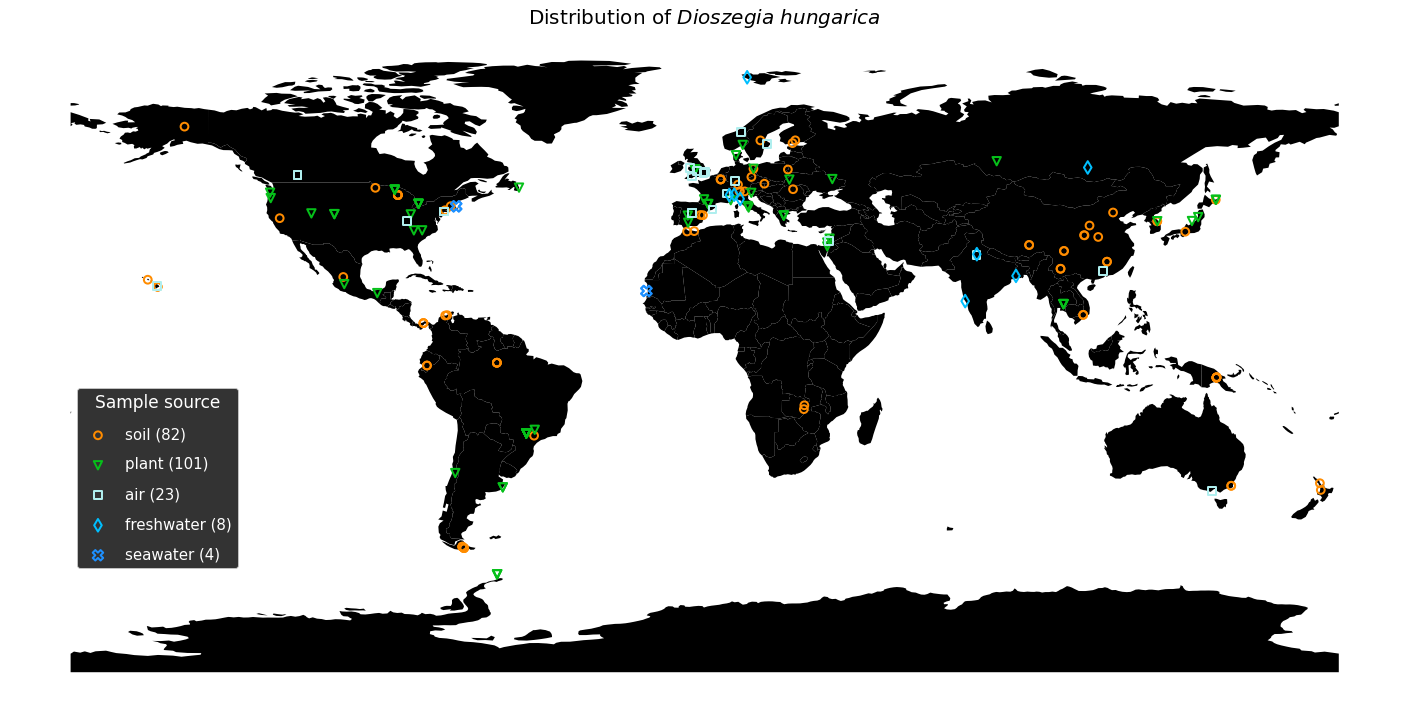

In [6]:
map = world.plot(color ="black")
map.set_axis_off()

n_soil  = len(df_meta[df_meta["Environment_type"] == "soil"])
n_plant = len(df_meta[df_meta["Environment_type"] == "plant"])
n_air   = len(df_meta[df_meta["Environment_type"] == "air"])
n_water = len(df_meta[df_meta["Environment_type"] == "freshwater"])
n_marine = len(df_meta[df_meta["Environment_type"] == "seawater"])

df_meta_locations[df_meta["Environment_type"] == "soil"].plot(ax=map, marker = "o", color = "none", alpha = 1, linewidth=2, 
                                                              edgecolor = "darkorange", markersize = 60, label=f"soil ({n_soil})")
df_meta_locations[df_meta["Environment_type"] == "plant"].plot(ax=map, marker = "v", color = "none", alpha = 1, linewidth=2, 
                                                               edgecolor = "#06C01A", markersize = 70, label=f"plant ({n_plant})")
df_meta_locations[df_meta["Environment_type"] == "air"].plot(ax=map, marker = "s", color = "none", alpha = 1, linewidth=2, 
                                                             edgecolor = "paleturquoise", markersize = 60, label=f"air ({n_air})")
df_meta_locations[df_meta["Environment_type"] == "freshwater"].plot(ax=map, marker = "d", color = "none", alpha = 1, linewidth=2, 
                                                                    edgecolor = "deepskyblue", markersize = 80, label=f"freshwater ({n_water})")
df_meta_locations[df_meta["Environment_type"] == "seawater"].plot(ax=map, marker = "X", color = "none", alpha = 1, linewidth=2, 
                                                                    edgecolor = "dodgerblue", markersize = 110, label=f"seawater ({n_marine})")
leg = map.legend(loc=(0.05, 0.2), labelspacing=1, fontsize=15, 
                 facecolor = "black",  labelcolor="white", fancybox=True)
leg.set_title("Sample source")
title = leg.get_title()
title.set_color("white")
title.set_size(17)

plt.title("Distribution of $Dioszegia$ $hungarica$", fontsize=20)

##### _Dioszegia hungarica_ distribution map including negative samples

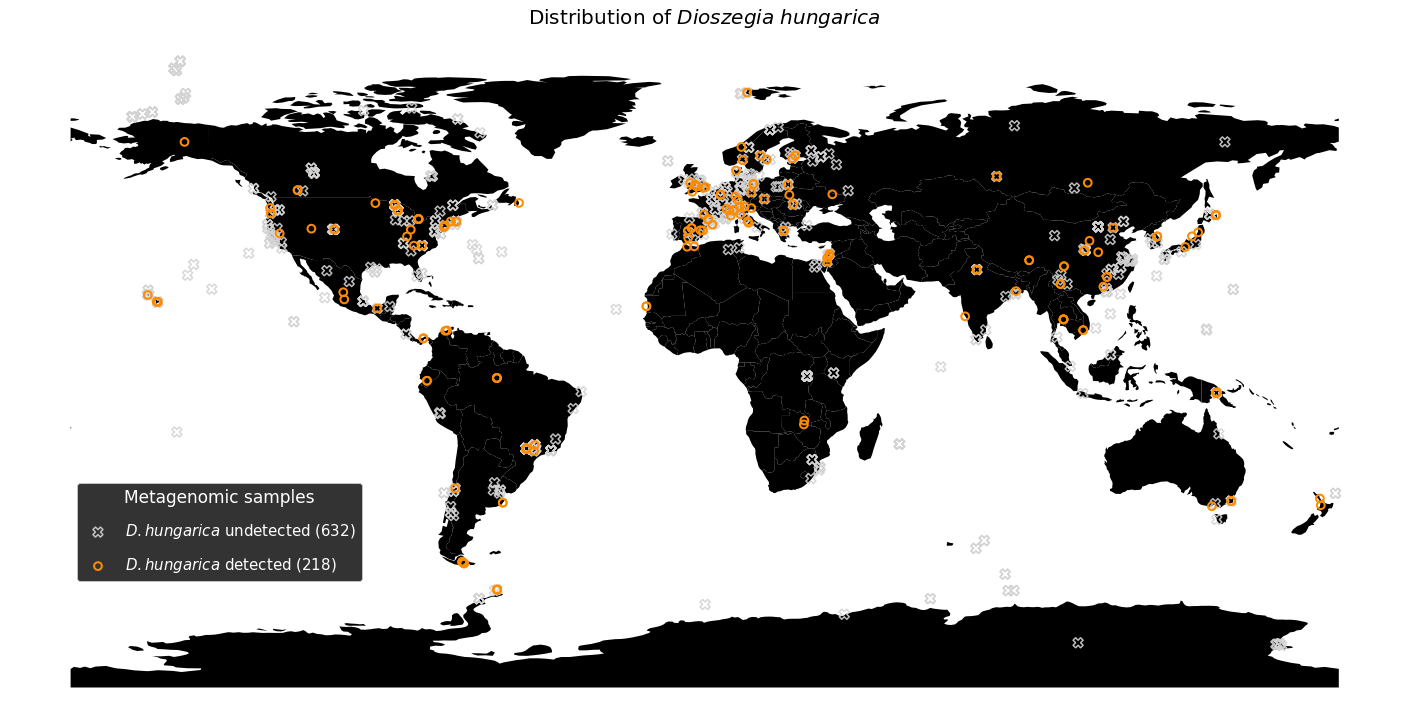

In [7]:
map = world.plot(color ="black")
map.set_axis_off()


df_nega_locations.plot(ax=map, marker = "X", color = "none", alpha = 0.9, linewidth=1.5, edgecolor = "lightgrey", 
                       markersize = 100, label=f"$D. hungarica$ undetected ({len(df_nega)})")

df_meta_locations.plot(ax=map, marker = "o", color = "none", alpha = 1, linewidth=2, edgecolor = "darkorange", 
                       markersize = 60, label=f"$D. hungarica$ detected ({len(df_meta)})")


leg = map.legend(loc=(0.05, 0.2), labelspacing=1, fontsize=15, facecolor = "black",  labelcolor="white", fancybox=True)
leg.set_title("Metagenomic samples")
title = leg.get_title()
title.set_color("white")
title.set_size(17)

plt.title("Distribution of $Dioszegia$ $hungarica$", fontsize=20)
plt.savefig(fname = "Dioszegia_map_paper.png", dpi=400, bbox_inches="tight")

#### Additionnal information

In [18]:
df_geo = pd.read_csv("results_D_hungarica_metagenomes_only.tsv", sep="\t")
presence = len(df_geo[df_geo["Presence_D.hungarica"] == "True"])
absence = len(df_geo[df_geo["Presence_D.hungarica"] == "False"])

list_abs = []
list_pre = []
list_env = df_geo.groupby("Environment_type").count().index
for env in list_env:
    tmp_df = df_geo[df_geo["Environment_type"] == env]
    presence = len(tmp_df[tmp_df["Presence_D.hungarica"] == True])
    absence = len(tmp_df[tmp_df["Presence_D.hungarica"] == False])
    list_abs.append(absence)
    list_pre.append(presence)
    
list_labels_absent = []
list_labels_present = []

for a, p in zip(list_abs, list_pre):
    list_labels_absent.append(f"{a} ({a/(a+p)*100:.0f}%)")
    list_labels_present.append(f"{p} ({p/(a+p)*100:.0f}%)")

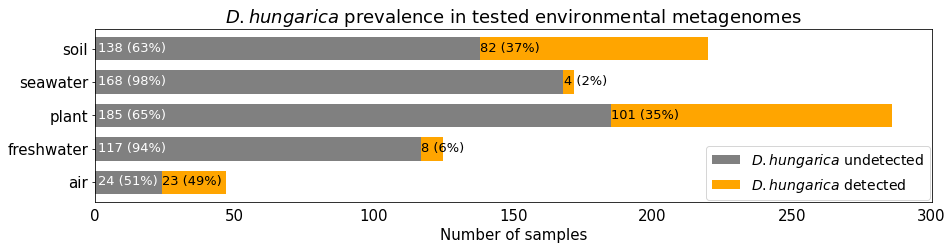

In [19]:
fig = plt.figure()
fig.set_size_inches(15, 4)

plt.barh(list_env, list_abs, label="$D. hungarica$ undetected", color="gray", height = 0.7)
plt.barh(list_env, list_pre, label="$D. hungarica$ detected", color="orange", height = 0.7, left=list_abs)

for k in range(1,len(list_env)+1):
    plt.annotate(list_labels_absent[k-1], xy=(1, k-1.09), color="white", fontsize=13)
    plt.annotate(list_labels_present[k-1], xy=(list_abs[k-1]+0.1, k-1.09), color="black", fontsize=13)

plt.tick_params(labelsize=15)
plt.title('$D. hungarica$ prevalence in tested environmental metagenomes', size=18)
plt.xlabel("Number of samples", size=15)
plt.legend(loc=(0.73, 0.01), fontsize=14)
plt.tick_params(bottom=False)
plt.subplots_adjust(bottom= 0.2, top = 0.8)

plt.savefig(fname = "environment_stats.png", dpi=150, bbox_inches="tight")

#### Session information

In [10]:
%load_ext watermark
%watermark -t -d -v -m
print("")
%watermark -w -p pandas,geopandas,shapely,matplotlib,geopy,jupyterlab

Python implementation: CPython
Python version       : 3.10.2
IPython version      : 7.30.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit


pandas    : 1.4.2
geopandas : 0.10.2
shapely   : 1.8.0
matplotlib: 3.5.1
geopy     : 2.2.0
jupyterlab: 3.3.4

Watermark: 2.3.0

